In [1]:
%matplotlib notebook
import os 
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# define parent directory
root_dir = "Z:/Isabel/arena/camera_calibration_files/"
img_date = input("input date of image acquisition (YYMMDD): ")
calibration_folder = f"{img_date}_calibration_images/"
calibration_path = os.path.join(root_dir, calibration_folder)

input date of image acquisition (YYMMDD): 240327


In [3]:
# get the image for each camera
image_files = []
for f in os.listdir(calibration_path):
    if f == 'Thumbs.db':
        continue
    image_files.append(f)
print(image_files)
n_cams = len(image_files)

['blue_2024-03-27T09_27_33.tiff', 'green_2024-03-27T09_27_33.tiff', 'red_2024-03-27T09_27_33.tiff', 'yellow_2024-03-27T09_27_33.tiff']


In [4]:
''' get the camera coordinates of the points '''
images = []
for i, img_file in enumerate(image_files):
    # load the image
    img_path = calibration_path + '/' + img_file
    img = mpimg.imread(img_path)
    images.append(img)
    
all_pts = {} # to store the selected points

In [5]:
[img_y, img_x] = images[0].shape

#### For each camera view, select the known points in order:
    1. center point
    2. feeder centers (green, blue, yellow, red)
    3. water dish corners (clockwise, starting b/w yellow and red feeders)
    4. image corners (bottom left, top right)

<IPython.core.display.Javascript object>


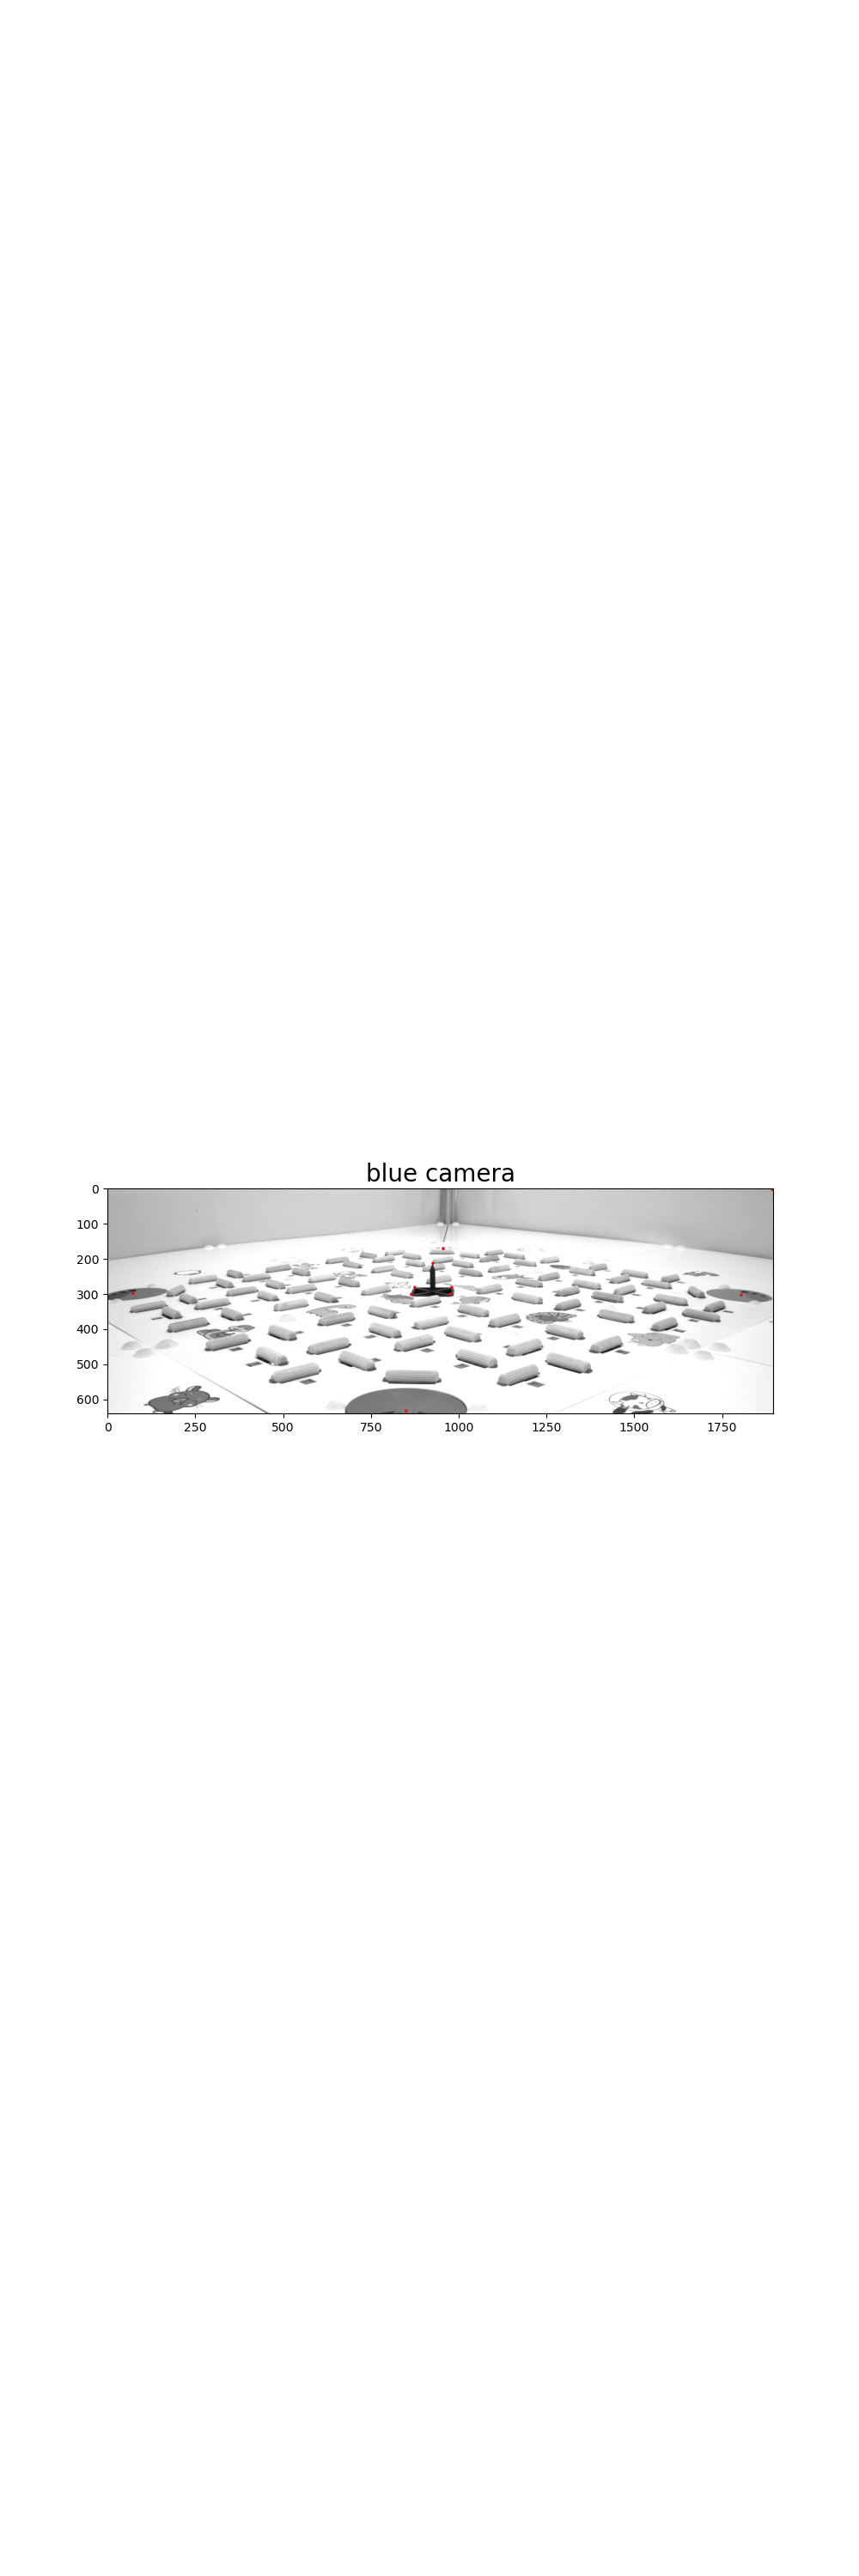

In [9]:
''' blue camera '''
# data params
idx = 0
cam_id = str.split(image_files[idx], '_')[0]

# fig params
fig, ax = plt.subplots(figsize=(10, 30))

# plot the image
ax.imshow(images[idx], cmap='gray', aspect='equal')
ax.set_title(f'{cam_id} camera', fontsize=20)
plt.show()

# click points
pt_list = []
def onclick(event):
    pt_list.append(np.asarray([event.x, event.y]))
    circle = plt.Circle((event.xdata,event.ydata), 2.5, color='r')
    ax.add_patch(circle)
    fig.canvas.draw()
    plt.show()
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [10]:
fig.canvas.mpl_disconnect(cid)

In [11]:
# get the 2D coords
n_pts = len(pt_list)
assert n_pts == 11
cam_pts = np.full((n_pts, 2), np.nan)
for i, pt in enumerate(pt_list):
    cam_pts[i, :] = pt
    
# normalize and convert to pixel coords
canvas_min = cam_pts[-2]
canvas_max = cam_pts[-1]
cam_pts_mod = cam_pts[:-2]
norm_pts = (cam_pts_mod - canvas_min) / (canvas_max - canvas_min)
norm_pts[:, 1] = 1 - norm_pts[:, 1] # y-axis is flipped
pix_pts = norm_pts * np.asarray([img_x, img_y])

# store for this camera
all_pts[f'{cam_id}'] = pix_pts

In [12]:
pix_pts

array([[ 928.40310078,  210.88122605],
       [  73.48837209,  296.70498084],
       [ 852.46511628,  632.64367816],
       [ 957.79844961,  169.1954023 ],
       [1807.81395349,  301.6091954 ],
       [ 982.29457364,  279.54022989],
       [ 977.39534884,  299.15708812],
       [ 867.1627907 ,  299.15708812],
       [ 876.96124031,  279.54022989]])

<IPython.core.display.Javascript object>


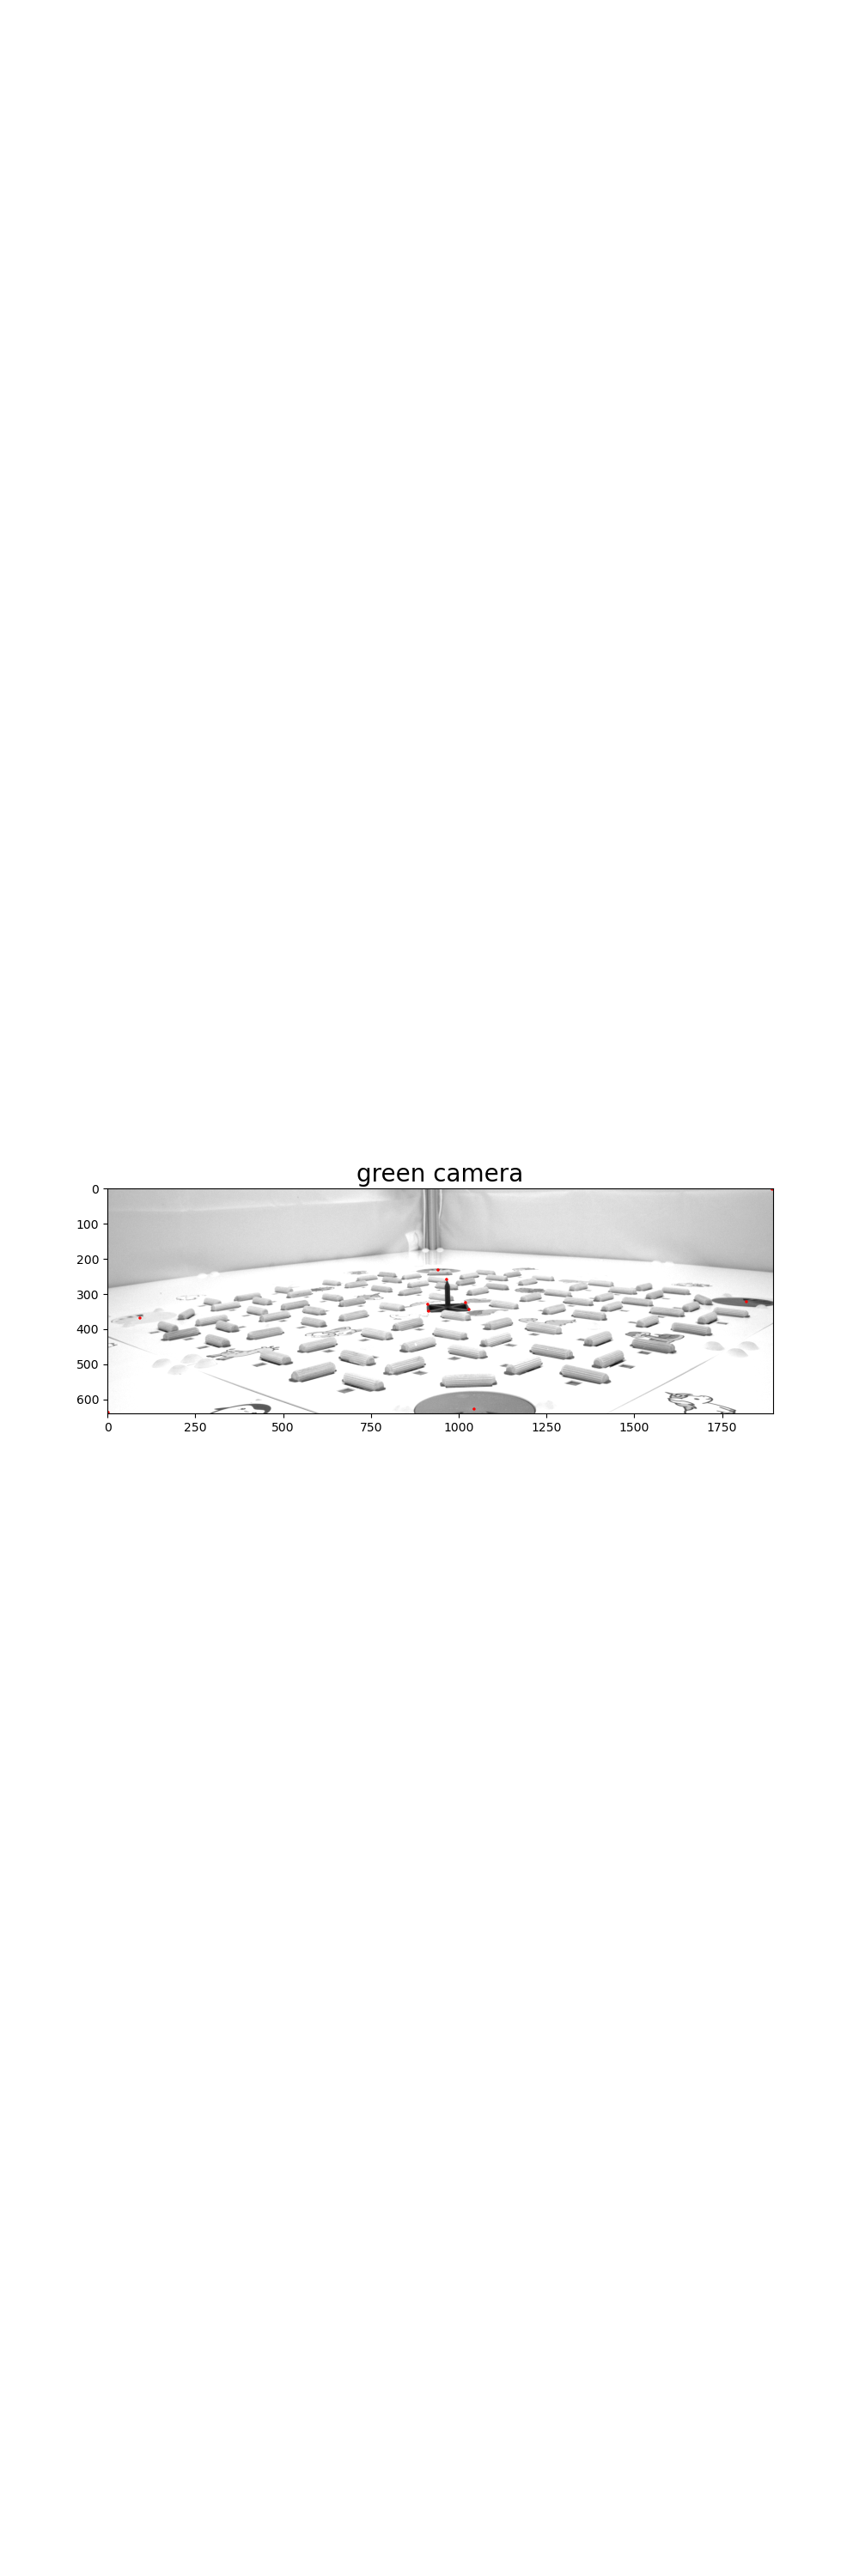

C:\Users\ilow1\AppData\Local\Temp\ipykernel_8856\2963842555.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
C:\Users\ilow1\AppData\Local\Temp\ipykernel_8856\2963842555.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis')


In [13]:
''' green camera '''
# data params
idx = 1
cam_id = str.split(image_files[idx], '_')[0]

# fig params
fig, ax = plt.subplots(figsize=(10, 30))
cmap = cm.get_cmap('viridis')
colors = cm.get_cmap('viridis')

# plot the image
ax.imshow(images[idx], cmap='gray', aspect='equal')
ax.set_title(f'{cam_id} camera', fontsize=20)
plt.show()

# click points
pt_list = []
def onclick(event):
    pt_list.append(np.asarray([event.x, event.y]))
    circle = plt.Circle((event.xdata,event.ydata), 2.5, color='r')
    ax.add_patch(circle)
    fig.canvas.draw()
    plt.show()
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [14]:
fig.canvas.mpl_disconnect(cid)

In [15]:
# get the 2D coords
n_pts = len(pt_list)
assert n_pts == 11
cam_pts = np.full((n_pts, 2), np.nan)
for i, pt in enumerate(pt_list):
    cam_pts[i, :] = pt
    
# normalize and convert to pixel coords
canvas_min = cam_pts[-2]
canvas_max = cam_pts[-1]
cam_pts_mod = cam_pts[:-2]
norm_pts = (cam_pts_mod - canvas_min) / (canvas_max - canvas_min)
norm_pts[:, 1] = 1 - norm_pts[:, 1] # y-axis is flipped
pix_pts = norm_pts * np.asarray([img_x, img_y])

# store for this camera
all_pts[f'{cam_id}'] = pix_pts

<IPython.core.display.Javascript object>


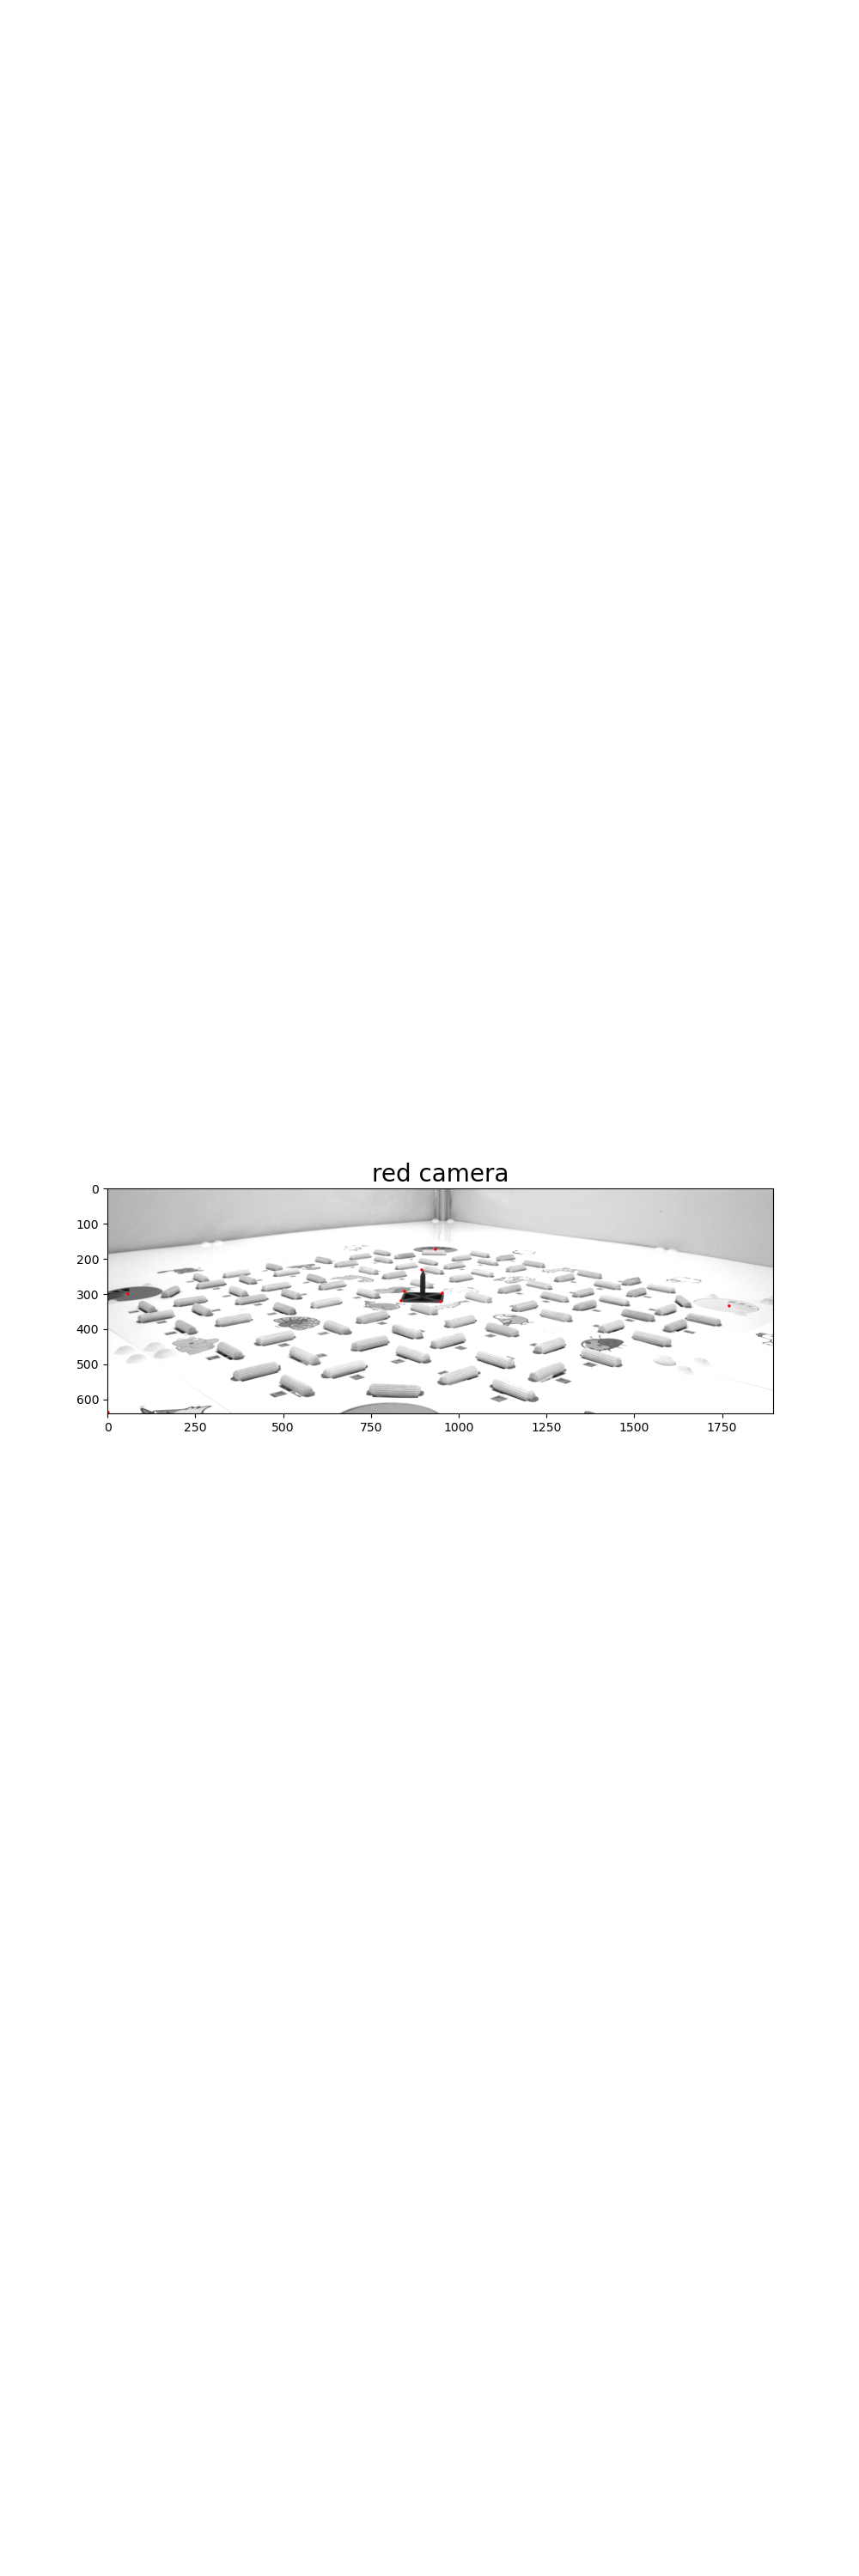

C:\Users\ilow1\AppData\Local\Temp\ipykernel_8856\4211345411.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
C:\Users\ilow1\AppData\Local\Temp\ipykernel_8856\4211345411.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis')


In [16]:
''' red camera '''
# data params
idx = 2
cam_id = str.split(image_files[idx], '_')[0]

# fig params
fig, ax = plt.subplots(figsize=(10, 30))
cmap = cm.get_cmap('viridis')
colors = cm.get_cmap('viridis')

# plot the image
ax.imshow(images[idx], cmap='gray', aspect='equal')
ax.set_title(f'{cam_id} camera', fontsize=20)
plt.show()

# click points
pt_list = []
def onclick(event):
    pt_list.append(np.asarray([event.x, event.y]))
    circle = plt.Circle((event.xdata,event.ydata), 2.5, color='r')
    ax.add_patch(circle)
    fig.canvas.draw()
    plt.show()
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [17]:
fig.canvas.mpl_disconnect(cid)

In [18]:
# get the 2D coords
n_pts = len(pt_list)
assert n_pts == 11
cam_pts = np.full((n_pts, 2), np.nan)
for i, pt in enumerate(pt_list):
    cam_pts[i, :] = pt
    
# normalize and convert to pixel coords
canvas_min = cam_pts[-2]
canvas_max = cam_pts[-1]
cam_pts_mod = cam_pts[:-2]
norm_pts = (cam_pts_mod - canvas_min) / (canvas_max - canvas_min)
norm_pts[:, 1] = 1 - norm_pts[:, 1] # y-axis is flipped
pix_pts = norm_pts * np.asarray([img_x, img_y])

# store for this camera
all_pts[f'{cam_id}'] = pix_pts

<IPython.core.display.Javascript object>


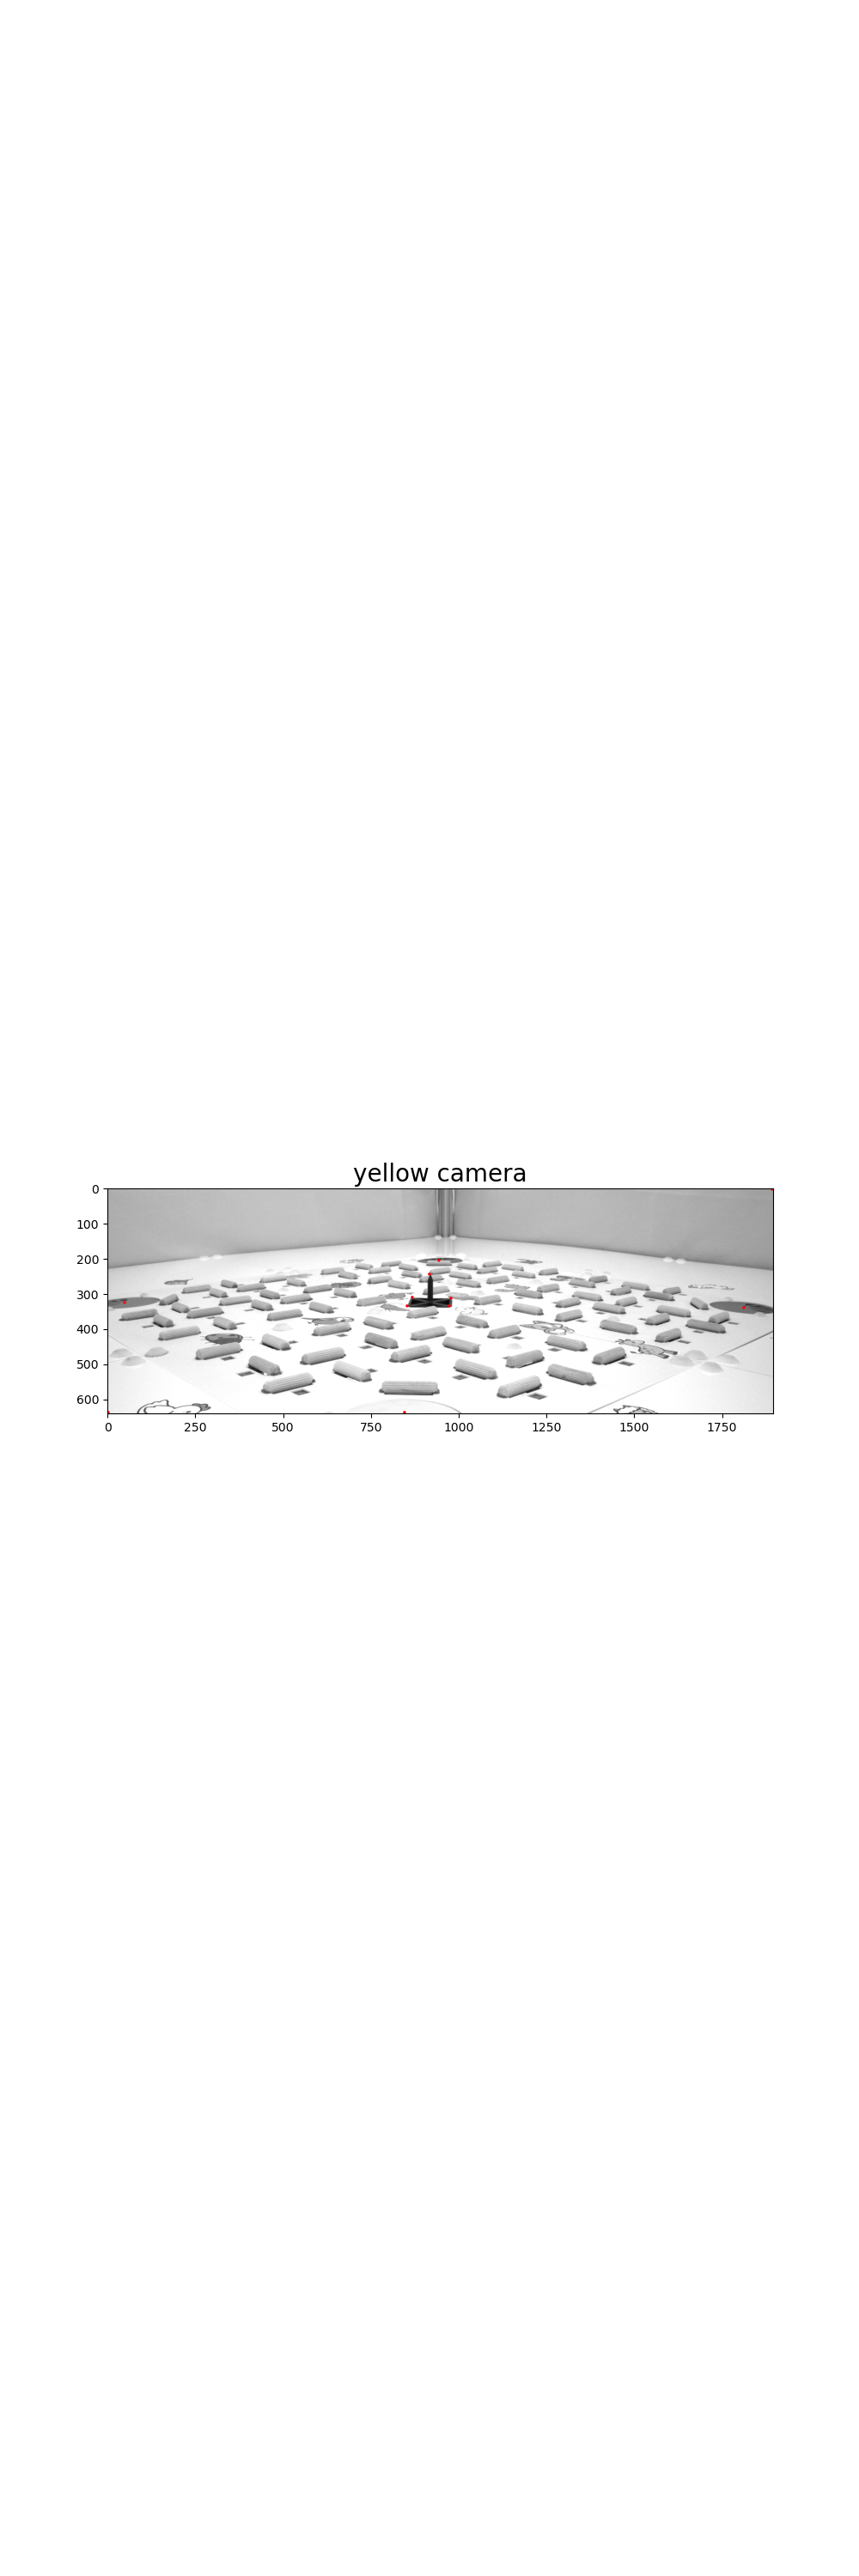

C:\Users\ilow1\AppData\Local\Temp\ipykernel_8856\413775076.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
C:\Users\ilow1\AppData\Local\Temp\ipykernel_8856\413775076.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis')


In [19]:
''' yellow camera '''
# data params
idx = 3
cam_id = str.split(image_files[idx], '_')[0]

# fig params
fig, ax = plt.subplots(figsize=(10, 30))
cmap = cm.get_cmap('viridis')
colors = cm.get_cmap('viridis')

# plot the image
ax.imshow(images[idx], cmap='gray', aspect='equal')
ax.set_title(f'{cam_id} camera', fontsize=20)
plt.show()

# click points
pt_list = []
def onclick(event):
    pt_list.append(np.asarray([event.x, event.y]))
    circle = plt.Circle((event.xdata,event.ydata), 2.5, color='r')
    ax.add_patch(circle)
    fig.canvas.draw()
    plt.show()
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [20]:
fig.canvas.mpl_disconnect(cid)

In [21]:
# get the 2D coords
n_pts = len(pt_list)
assert n_pts == 11
cam_pts = np.full((n_pts, 2), np.nan)
for i, pt in enumerate(pt_list):
    cam_pts[i, :] = pt
    
# normalize and convert to pixel coords
canvas_min = cam_pts[-2]
canvas_max = cam_pts[-1]
cam_pts_mod = cam_pts[:-2]
norm_pts = (cam_pts_mod - canvas_min) / (canvas_max - canvas_min)
norm_pts[:, 1] = 1 - norm_pts[:, 1] # y-axis is flipped
pix_pts = norm_pts * np.asarray([img_x, img_y])

# store for this camera
all_pts[f'{cam_id}'] = pix_pts

In [22]:
# store the value, camera, and point index for each point
cam_ids = ['red', 'yellow', 'green', 'blue']
n_pts = all_pts[cam_ids[0]].shape[0]  
pt_idx = np.arange(n_pts)
for i, cam in enumerate(cam_ids):
    pts = all_pts[cam]    
    if i == 0:
        camera_ind = np.full(n_pts, i)
        point_ind = pt_idx
        points_2d = pts
    else:
        camera_ind = np.append(camera_ind, np.full(n_pts, i))
        point_ind = np.append(point_ind, pt_idx)
        points_2d = np.row_stack([points_2d, pts])

In [24]:
file_path = 'C:/Users/ilow1/Documents/code/bird_pose_tracking/calibration_files/'
folder = 'known_points/'
np.save(f'{file_path}{folder}{img_date}_camera_ind_feeders.npy', camera_ind)
np.save(f'{file_path}{folder}{img_date}_point_ind_feeders.npy', point_ind)
np.save(f'{file_path}{folder}{img_date}_points_2d_feeders.npy', points_2d)

In [25]:
points_2d.shape

(36, 2)

<IPython.core.display.Javascript object>


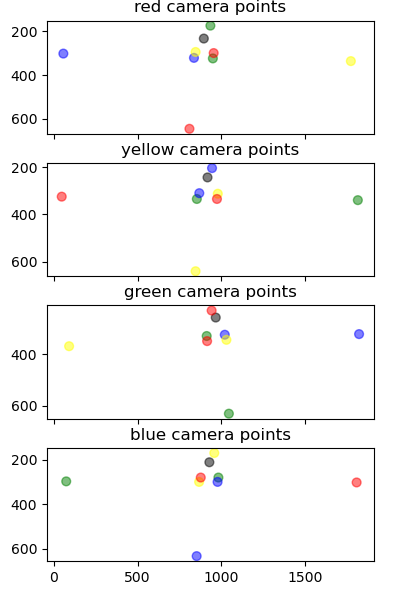

In [26]:
''' sanity check '''
# fig params
fig, axs = plt.subplots(n_cams, 1, sharex=True, figsize=(4, 6))
fig.tight_layout()
n_cams = len(cam_ids)
colors = ['black', 'green', 'blue', 'yellow', 'red', 
          'green', 'blue', 'yellow', 'red']

# saved/indexed points
for i in range(n_cams):
    ind2d = camera_ind==i
    pts = points_2d[ind2d]
    n_pts = pts.shape[0]
    axs[i].scatter(pts[:, 0], pts[:, 1],
                    s=40, c=colors, alpha=0.5)
    axs[i].invert_yaxis()
    axs[i].title.set_text(f'{cam_ids[i]} camera points')
    
plt.show()